# TD noté en analyse de donnée

### Alexandre Francony
### Adrien Servas
### Grégoire Woroniak

Charger le jeu de donnée « auto.csv » présent sur DVL.  
Nous allons effectuer une analyse exploratoire des données (EDA) avant d’appliquer la PCA. 
Notre étude comprend fondamentalement trois tâches principales : 
- Étape 1 : Aperçu de l'ensemble de données et analyse descriptive  
- Étape 2 : Prétraitement et nettoyage des données brutes  
- Étape 3: Application de la PCA et visualisation des données

In [167]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("auto.csv", sep = ",")

## Étape 1 : Aperçu de l'ensemble de données et analyse descriptive 
1. Afficher les 10 premières lignes du dataframe. Que remarquez-vous ?

In [168]:
df.head(10)


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


<span style="color: cyan">
On se rend compte que nos colonnes ne possèdent pas d'en tête, ce qui ne nous permet pas de faire une analyse complète.
<span>

2. Surprise  au  premier  rang :  première  ligne  ici  n'est  pas  un  en-tête ; c'est  juste  plus  de 
données.  Ajouter  des  noms  aux  colonnes  comme  suit puis  afficher  les  10  premières 
lignes :  
 
col_names = [ "symboling" , "normalized-losses" , "make" , "fuel-type" , "aspiration" , 
"num-of-doors","body-style", "drive-wheels" , "emplacement du moteur" , 
"empattement" , "longueur" , "largeur" , "hauteur" , "poids à vide" , "type de moteur" ,  
"nombre  de  cylindres"  ,  "taille  du  moteur"  ,  "système  de  carburant"  ,  "alésage"  , 
"course","taux  de  compression","puissance",  "crème-rpm"  ,  "ville-mpg"  ,  "dfroute-
mpg" , "prix" ].

In [169]:
col_names = [ "symboling" , "normalized-losses" , "make" , "fuel-type" , "aspiration" , 
"num-of-doors","body-style", "drive-wheels" , "emplacement du moteur" , 
"empattement" , "longueur" , "largeur" , "hauteur" , "poids à vide" , "type de moteur" , 
"nombre de cylindres" , "taille du moteur" , "système de carburant" , "alésage" , 
"course","taux de compression","puissance", "crème-rpm" , "ville-mpg" , "autoroute-mpg" , "prix" ]

df.columns = col_names
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,taux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg,prix
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


3. Explorer votre dataframe en utilisant les fonctions suivantes : 
- df.head() ,df.tail(), df.info(): Vu globale de l’ensemble de jeu de donnée 
- df.shape : Nombre d’observations   
- df.dtypes : Nombre et types d'entités  
- df.describe(), df.describe(include='object'): Statistique descriptive de l'ensemble de données

In [170]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,empattement,...,taille du moteur,système de carburant,alésage,course,taux de compression,puissance,crème-rpm,ville-mpg,autoroute-mpg,prix
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              204 non-null    int64  
 1   normalized-losses      204 non-null    object 
 2   make                   204 non-null    object 
 3   fuel-type              204 non-null    object 
 4   aspiration             204 non-null    object 
 5   num-of-doors           204 non-null    object 
 6   body-style             204 non-null    object 
 7   drive-wheels           204 non-null    object 
 8   emplacement du moteur  204 non-null    object 
 9   empattement            204 non-null    float64
 10  longueur               204 non-null    float64
 11  largeur                204 non-null    float64
 12  hauteur                204 non-null    float64
 13  poids à vide           204 non-null    int64  
 14  type de moteur         204 non-null    object 
 15  nombre

In [172]:
df.shape

(204, 26)

In [173]:
df.dtypes

symboling                  int64
normalized-losses         object
make                      object
fuel-type                 object
aspiration                object
num-of-doors              object
body-style                object
drive-wheels              object
emplacement du moteur     object
empattement              float64
longueur                 float64
largeur                  float64
hauteur                  float64
poids à vide               int64
type de moteur            object
nombre de cylindres       object
taille du moteur           int64
système de carburant      object
alésage                   object
course                    object
taux de compression      float64
puissance                 object
crème-rpm                 object
ville-mpg                  int64
autoroute-mpg              int64
prix                      object
dtype: object

In [174]:
df.describe()

,symboling,empattement,longueur,largeur,hauteur,poids à vide,taille du moteur,taux de compression,ville-mpg,autoroute-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [175]:
df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,emplacement du moteur,type de moteur,nombre de cylindres,système de carburant,alésage,course,puissance,crème-rpm,prix
count,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204,204
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,186
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,40,32,184,167,114,96,120,201,148,158,93,23,20,19,37,4


## Etape 2 : prétraitement et nettoyage des données 

En général, cette étape comprend ce qui suit : 
- Gestion de types 
  - df.dtypes : pour vérifier le type de données  
  - df.dtypes.unique() :pour donner le nb de variables de chaque type 
  - df.astype() pour changer le type de données 
- Suppression des colonnes inutiles (df.drop()) 
- Suppression des valeurs manquantes (df.dropna()) 
- Remplacement des valeurs numériques manquantes par : moyenne, mode, 
médiane, min, max, etc... (df.fillna(), df.replace()) 
- Suppression des doublons. (df.duplicates() , df.drop_duplicates()) 
- Gestion du format de l'heure. 
- Gérer les valeurs aberrantes.
4. Compter le nombre de valeurs manquantes en utilisant df.isna().sum(). Que remarquez-vous ?

In [176]:
df.isna().sum()

symboling                0
normalized-losses        0
make                     0
fuel-type                0
aspiration               0
num-of-doors             0
body-style               0
drive-wheels             0
emplacement du moteur    0
empattement              0
longueur                 0
largeur                  0
hauteur                  0
poids à vide             0
type de moteur           0
nombre de cylindres      0
taille du moteur         0
système de carburant     0
alésage                  0
course                   0
taux de compression      0
puissance                0
crème-rpm                0
ville-mpg                0
autoroute-mpg            0
prix                     0
dtype: int64

<span style="color: cyan">
On observe que nous n'avons aucune valeur NaN. Cela dit, en regardant directement dans le jeu de donnée, nous observons que nous avons des valeurs avec des '?'. Ces valeurs sont des valeurs manquantes, mais non reconnu pas le .isna().
<span>

5. Une deuxième surprise : des colonnes contiennent un « ? ». La fonctions isna() ne peut 
pas les détecter. Remplacer les « ? » par des np.na 

In [177]:
df.replace("?", np.nan, inplace=True)

6. Compter les doublons et supprimer les si besoin. 
df.duplicated().sum() : retourne le nombre  d’observations en doublon.

In [178]:
# Count the number of duplicate observations
num_duplicates = df.duplicated().sum()
print("Number of duplicate observations:", num_duplicates)

# Remove duplicate observations
df.drop_duplicates(inplace=True)

Number of duplicate observations: 0


- Compter à nouveau les valeurs manquantes et les doublons en utilisant les fonctions 
suivantes Nombre ou taux des valeurs manquantes 
    - df.isna().sum() #ou bien df.isnull().sum()  
  - df.isna().sum().sum() # nombre totale de cellules manquantes  
  - round(df.isna().sum().sum() / df.size * 100, 1) # percentage de cellules manquantes 

In [179]:
total_missing_values = df.isna().sum().sum()
print('Total missing values : ', total_missing_values)

Total missing values :  58


7. En déduire le pourcentage des cellules manquantes. Afficher un tableau qui ne montre 
que les colonnes avec des cellules manquantes.

In [180]:
pourcentage = round(df.isna().sum().sum() / df.size * 100, 1)
print('Percentage of missing values : ', pourcentage,'%')

Percentage of missing values :  1.1 %


In [181]:
colonnes = df.columns[df.isna().any()]
df[colonnes]

,normalized-losses,num-of-doors,alésage,course,puissance,crème-rpm,prix
0,NaN,two,3.47,2.68,111,5000,16500
1,NaN,two,2.68,3.47,154,5000,16500
2,164,four,3.19,3.40,102,5500,13950
3,164,four,3.19,3.40,115,5500,17450
4,NaN,two,3.19,3.40,110,5500,15250
...,...,...,...,...,...,...,...
199,95,four,3.78,3.15,114,5400,16845
200,95,four,3.78,3.15,160,5300,19045
201,95,four,3.58,2.87,134,5500,21485
202,95,four,3.01,3.40,106,4800,22470


8. Inspecter les types de chacune des colonnes ? utiliser df.dtypes.unique()

In [182]:
column_types = df.dtypes.unique()
column_types

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [183]:
df.dtypes.value_counts()

object     16
int64       5
float64     5
Name: count, dtype: int64

9. Donner le diagramme circulaire des types de données. Utiliser df.dtype.value_counts() 
pour obtenir le nb des variables appartenant à chaque type.

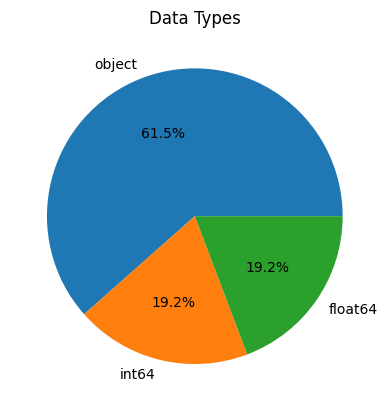

In [184]:
data_type_counts = df.dtypes.value_counts()

plt.pie(data_type_counts, labels=data_type_counts.index, autopct='%1.1f%%')
plt.title('Data Types')
plt.show()

10. Nettoyer les données comme suit : <br>
    a.  Supprimer les colonnes qui contiennent plus de 15% de données manquantes (utiliser le paramètre thresh de la fonction dropna). Vérifier que la colonne 'normalized-losses' est supprimée. <br>
    b.   Dans chacune des colonnes « alésage », « course », « puissance » et "crème-rpm » : <br>
        i.  Convertir les données numérique de type ‘O’ en ‘float64’ en utilisant df.astype()  <br>
        ii.  Remplacer les NA par la moyenne <br>
    c.  Dans la colonne « num-of-doors » : remplacer les na par « four »<br>

In [185]:
threshold = len(df) * 0.85
df.dropna(thresh=threshold, axis=1, inplace=True)

'normalized-losses' in df.columns

columns_to_convert = ['alésage', 'course', 'puissance', 'crème-rpm']
for column in columns_to_convert:
    df[column] = df[column].astype(float)
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

df['num-of-doors'].fillna('four', inplace=True)

11. Supprimer toutes les lignes manquantes s’il y en a.

In [186]:
df.dropna(inplace=True)

12. Sélectionner pour la suite les colonnes numériques du dataframe. Calculer son coefficient 
de corrélation et afficher son heatmap. Quelles sont les variables les plus correlées entre 
elles ? 

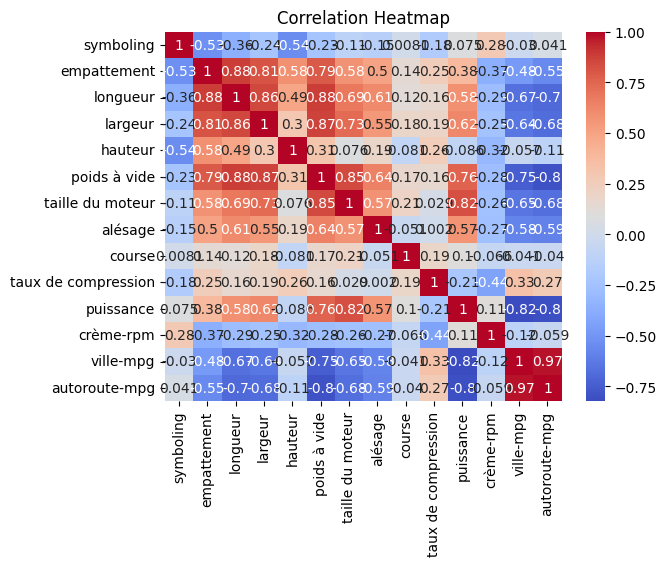

In [187]:
import seaborn as sns

numerical_columns = df.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

13. Sélectionner pour la suite les colonnes numériques [‘longueur', 'largeur', 'hauteur',"prix"]. 
On note X ce nouveau dataframe. Standardiser le avec le SdandardScaler

In [188]:
from sklearn.preprocessing import StandardScaler

X = df[['longueur', 'largeur', 'hauteur', 'prix']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


14. Appliquer le skee plot pour déterminer le meilleur nombre de composante principale 


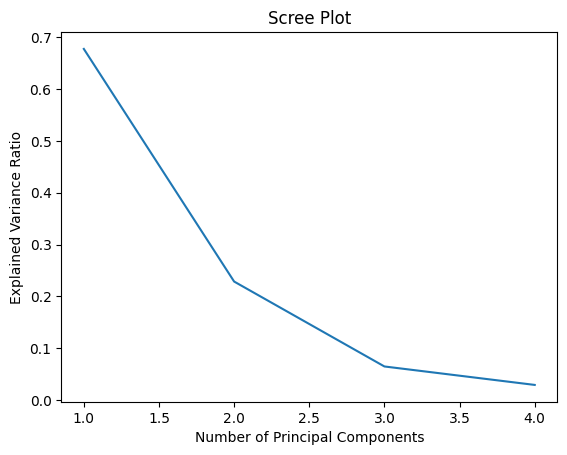

In [189]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


<span style="color: cyan">
Nous observons à l'aide de la methode Elbow, en produisant le Scree-plot, que le nombre optimal de composantes principales est 2.
</span>

15. Appliquer la PCA en utilisant 2 composantes.

In [190]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

16. Afficher les données avec les projections et les axes principaux.

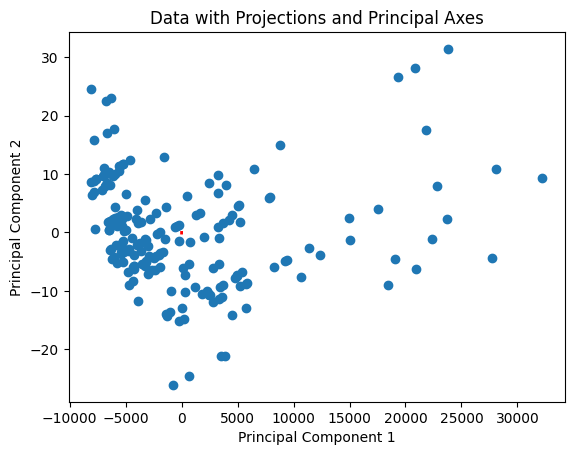

In [191]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

plt.plot([0, pca.components_[0, 0]], [0, pca.components_[0, 1]], color='red', linewidth=2)
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], color='red', linewidth=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('Data with Projections and Principal Axes')

plt.show()

17. Commenter et analyser les résultats.

### Conclusion
<span style="color: cyan">
A l'aide de ces analyses, nous avons pu nettoyer le dataset à notre disposition afin de le rendre utilisable. Par la suite nous avons pu le manipuler et en tirer des informations sur le types de données contenu dans ce dernier, pour mieux le comprendre et l'appréhender. Finalement, nous avons calculé les coefficients de corrélation. Pour terminer nous avons appliqué la PCA sur le dataset X nouvellement extrait du dataset et utilisant 2 composantes.
</span>